<div class='status' style='background-color: #183a4b; color: white; padding-top: 4px; padding-bottom: 4px; padding-left: 20px; padding-right: 20px; border-radius: 10px; font-family: Arial, sans-serif; font-size: 26px; display: inline-block; text-align: center; box-shadow: 0px 3px 4px rgba(0, 0, 0, 0.5);'><b>SupaBase</B> - AI MedReview Integration</div>

## Loading Libraries

In [1]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import datetime
import os
from tqdm import tqdm

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings("ignore")

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [2]:
from ai_medreview.build_surgery_metrics import *

<div class='status' style='background-color: #f5c244; color: white; padding-top: 2px; padding-bottom: 2px; padding-left: 7px; padding-right: 7px; border-radius: 6px; font-family: Arial, sans-serif; font-size: 18px; display: inline-block; text-align: center; box-shadow: 0px 3px 4px rgba(0, 0, 0, 0.2);'><b>Loading</b> dataset</div>

In [3]:
df_dict = load_data()

Table: appointments --------> DF Shape: (19798, 6)
Table: cx_screening --------> DF Shape: (234, 4)
Table: surgery --------> DF Shape: (10, 3)
Table: female_pts --------> DF Shape: (1309, 4)
Table: bowel_non_responder --------> DF Shape: (266, 4)
Table: bowel_normal --------> DF Shape: (235, 4)
Table: bowel_positive --------> DF Shape: (5, 4)


In [7]:
ddf = make_heatmap(df_dict, surgery_id=2)

Using dynamic list_size: 4250 for surgery_id: 2


In [8]:
df_dict['surgery']

,id,name,list_size
0,2,Earls-Court-Surgery,4250
1,1,Earls-Court-Medical-Centre,6817
2,3,Emperors-Gate-Health-Centre,6989
3,4,Health-Partners-at-Violet-Melchett,10153
4,6,Knightsbridge-Medical-Centre,15370
5,7,Scarsdale-Medical-Centre,7949
6,8,Stanhope-Mews-Surgery,16277
7,9,The-Abingdon-Medical-Practice,8787
8,10,The-Chelsea-Practice,6533
9,5,Kensington-Park-Medical-Centre,0


In [9]:
ddf

,cx_screening,bowel_screening_rate,appointments_used,appointments_dna
event_date,,,,
2024-01-31,0.34375,0.475000,0.747692,0.030407
2024-02-29,0.78125,0.410256,0.781900,0.087421
2024-03-31,0.37500,0.527778,0.740090,0.085249
2024-04-30,0.65625,0.468085,0.830226,0.023891
2024-05-31,0.59375,0.470588,0.801448,0.019548
2024-06-30,0.46875,0.407407,0.640181,0.013575
2024-07-31,0.46875,0.600000,0.768869,0.025520
2024-08-31,0.43750,0.379310,0.585339,0.011946
2024-09-30,0.59375,0.545455,0.726516,0.034751


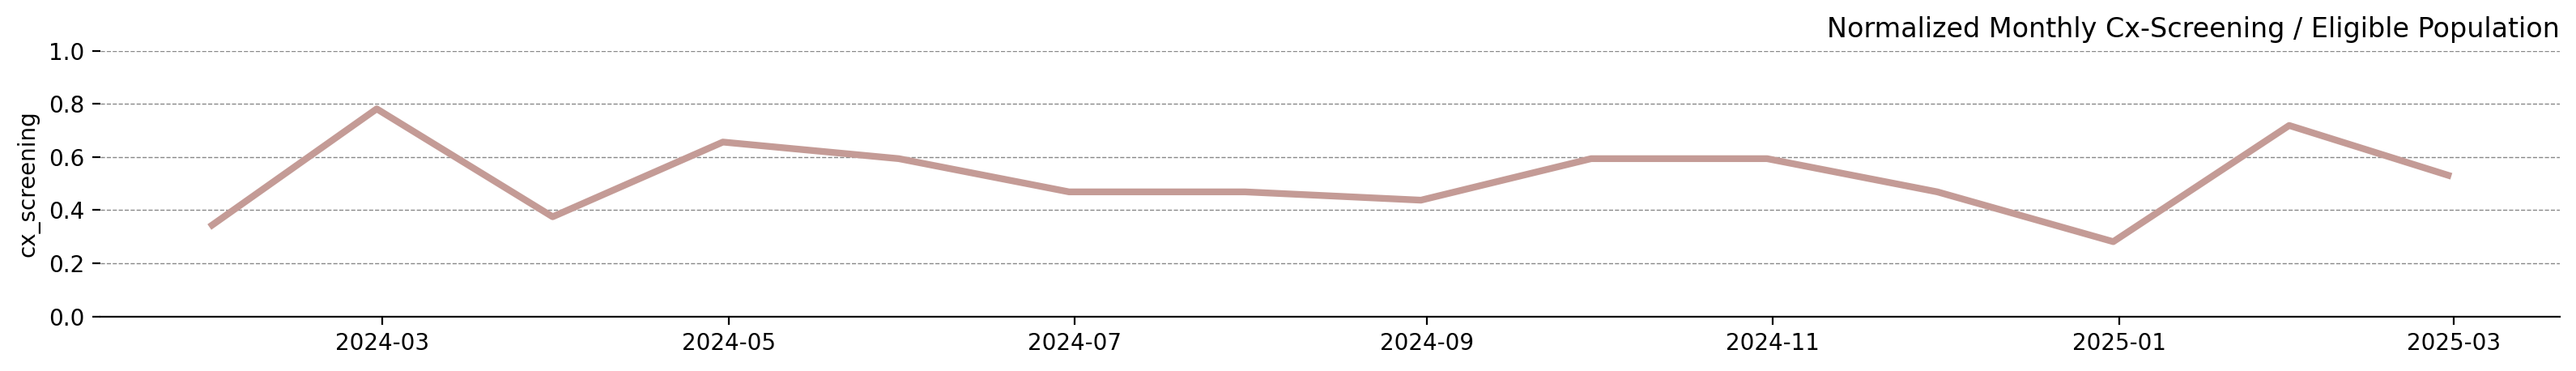

In [18]:
fig, ax = plt.subplots(figsize=(16, 2.4))
sns.lineplot(ddf, x=ddf.index, y='cx_screening', linewidth=3, color="#c49b96")

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax_title = ax.set_title(
    "Normalized Monthly Cx-Screening / Eligible Population", loc="right"
)

plt.xlabel("")
plt.tight_layout()
plt.show()

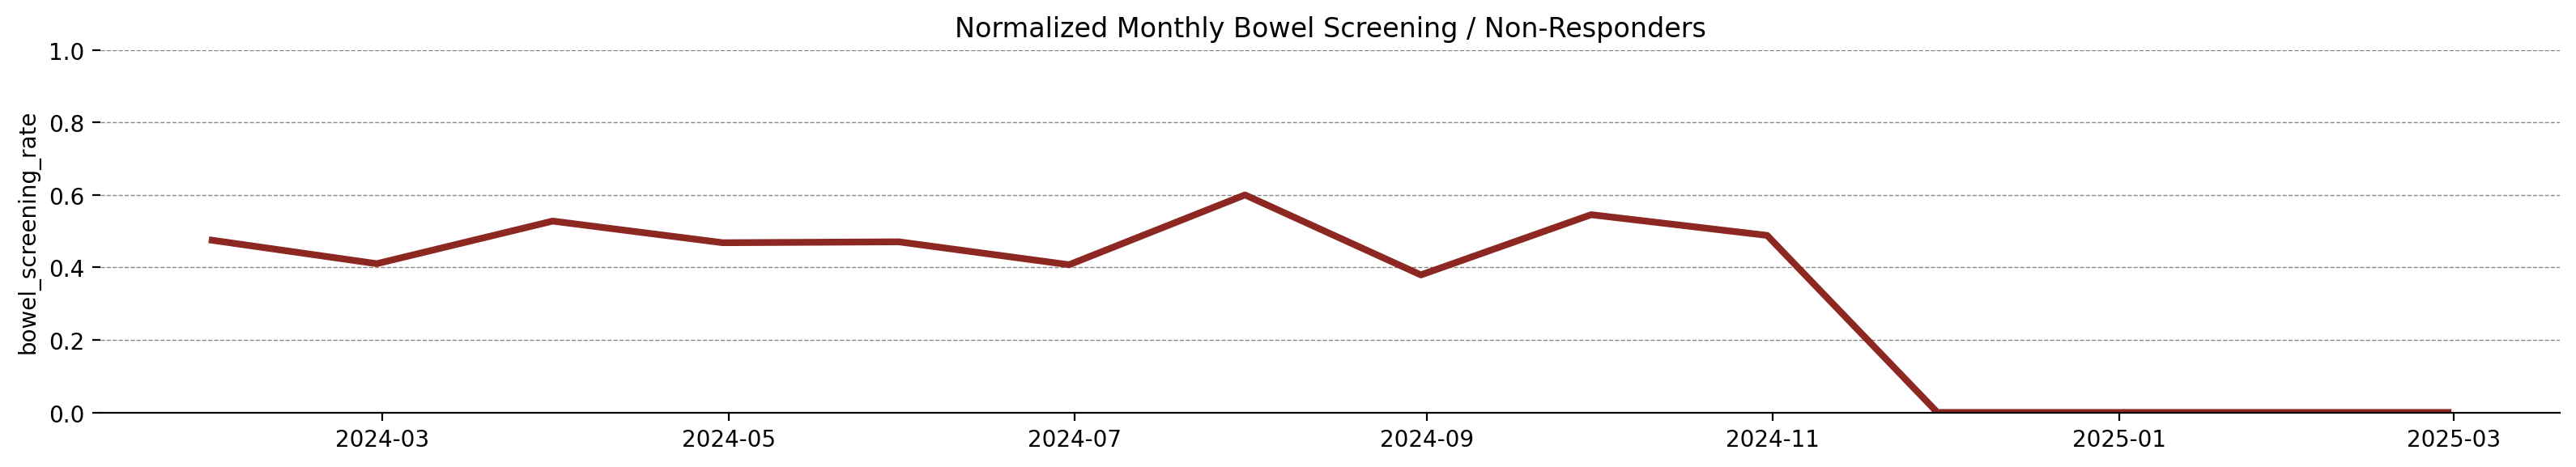

In [11]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.lineplot(ddf, x=ddf.index, y='bowel_screening_rate', linewidth=3, color="#8d2722")

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax_title = ax.set_title(
    "Normalized Monthly Bowel Screening / Non-Responders"
)

plt.xlabel("")
plt.tight_layout()
plt.show()

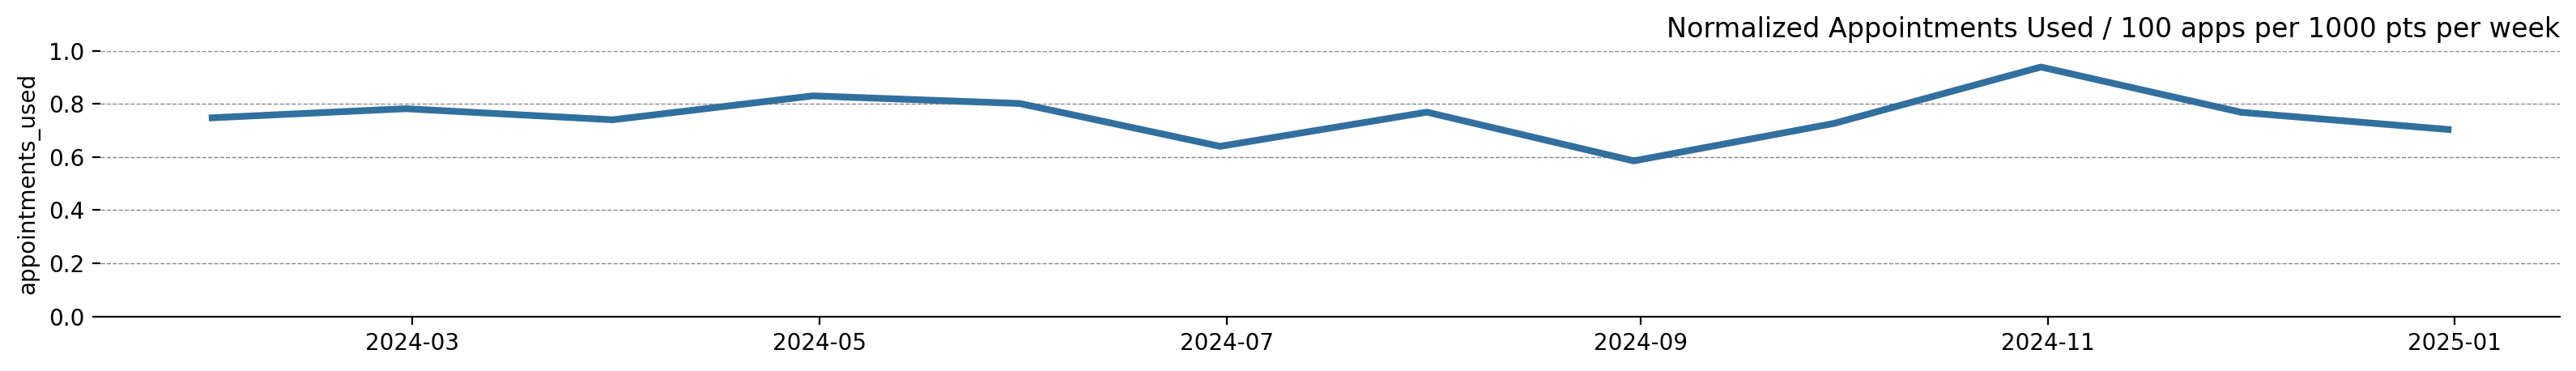

In [19]:
fig, ax = plt.subplots(figsize=(16, 2.4))
sns.lineplot(ddf, x=ddf.index, y='appointments_used', linewidth=3, color="#31709e")

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax_title = ax.set_title(
    "Normalized Appointments Used / 100 apps per 1000 pts per week", loc="right"
)

plt.xlabel("")
plt.tight_layout()
plt.show()

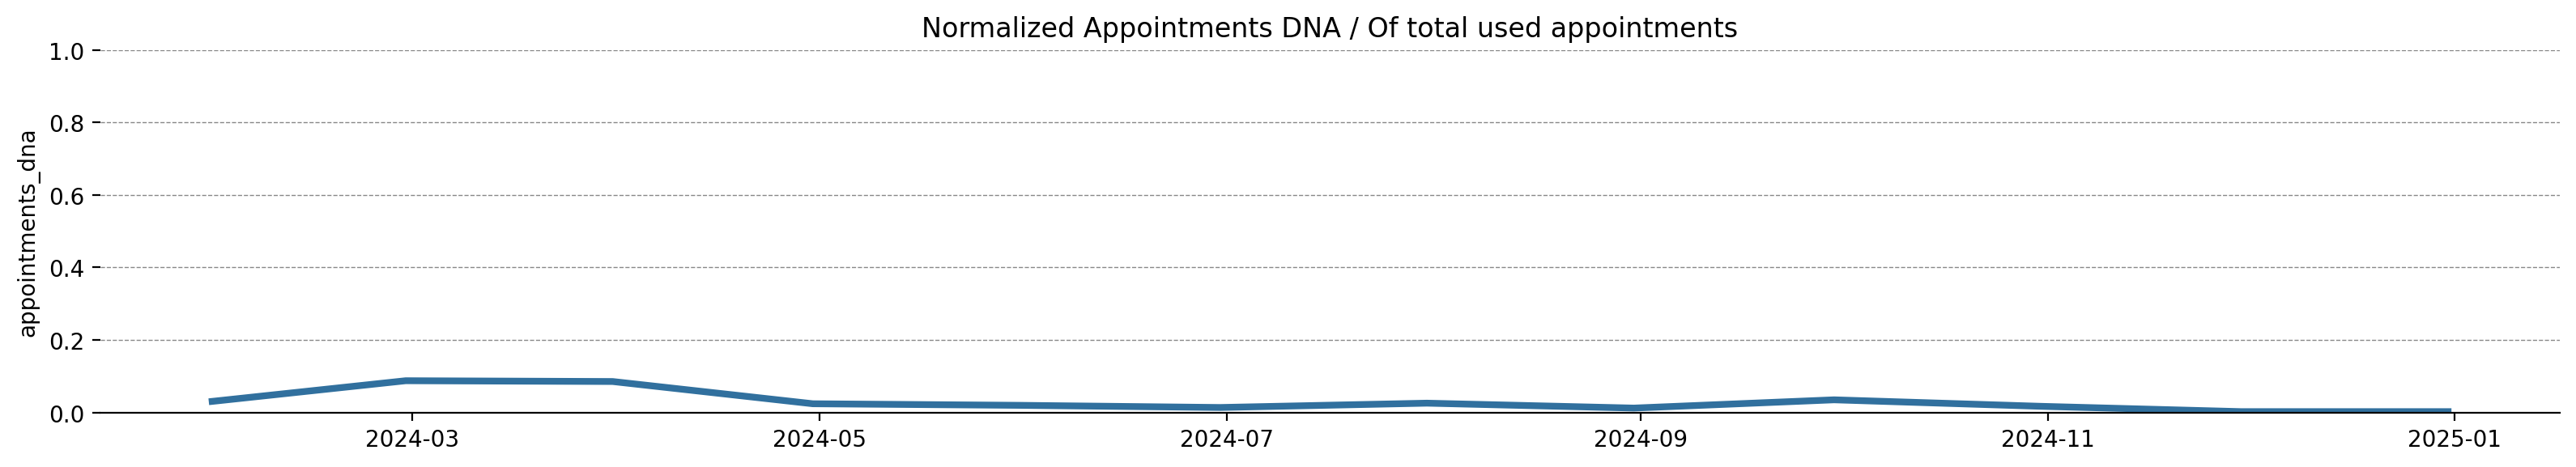

In [13]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.lineplot(ddf, x=ddf.index, y='appointments_dna', linewidth=3, color="#31709e")

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax_title = ax.set_title(
    "Normalized Appointments DNA / Of total used appointments"
)

plt.xlabel("")
plt.tight_layout()
plt.show()

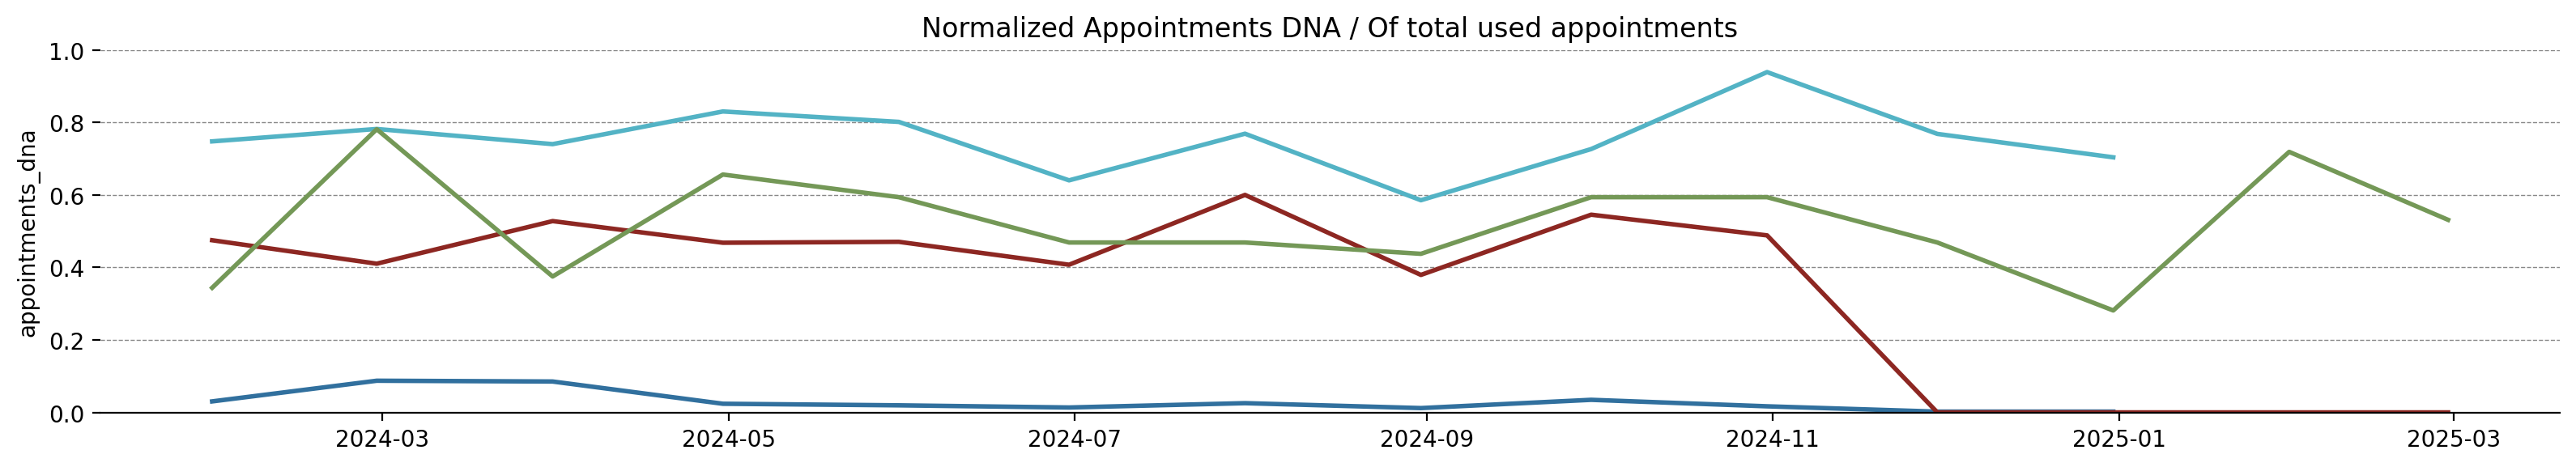

In [18]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.lineplot(ddf, x=ddf.index, y='appointments_dna', linewidth=2, color="#31709e")
sns.lineplot(ddf, x=ddf.index, y='appointments_used', linewidth=2, color="#53b3c5")
sns.lineplot(ddf, x=ddf.index, y='bowel_screening_rate', linewidth=2, color="#8d2722")
sns.lineplot(ddf, x=ddf.index, y='cx_screening', linewidth=2, color="#749857")

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax_title = ax.set_title(
    "Normalized Appointments DNA / Of total used appointments"
)

plt.xlabel("")
plt.tight_layout()
plt.show()

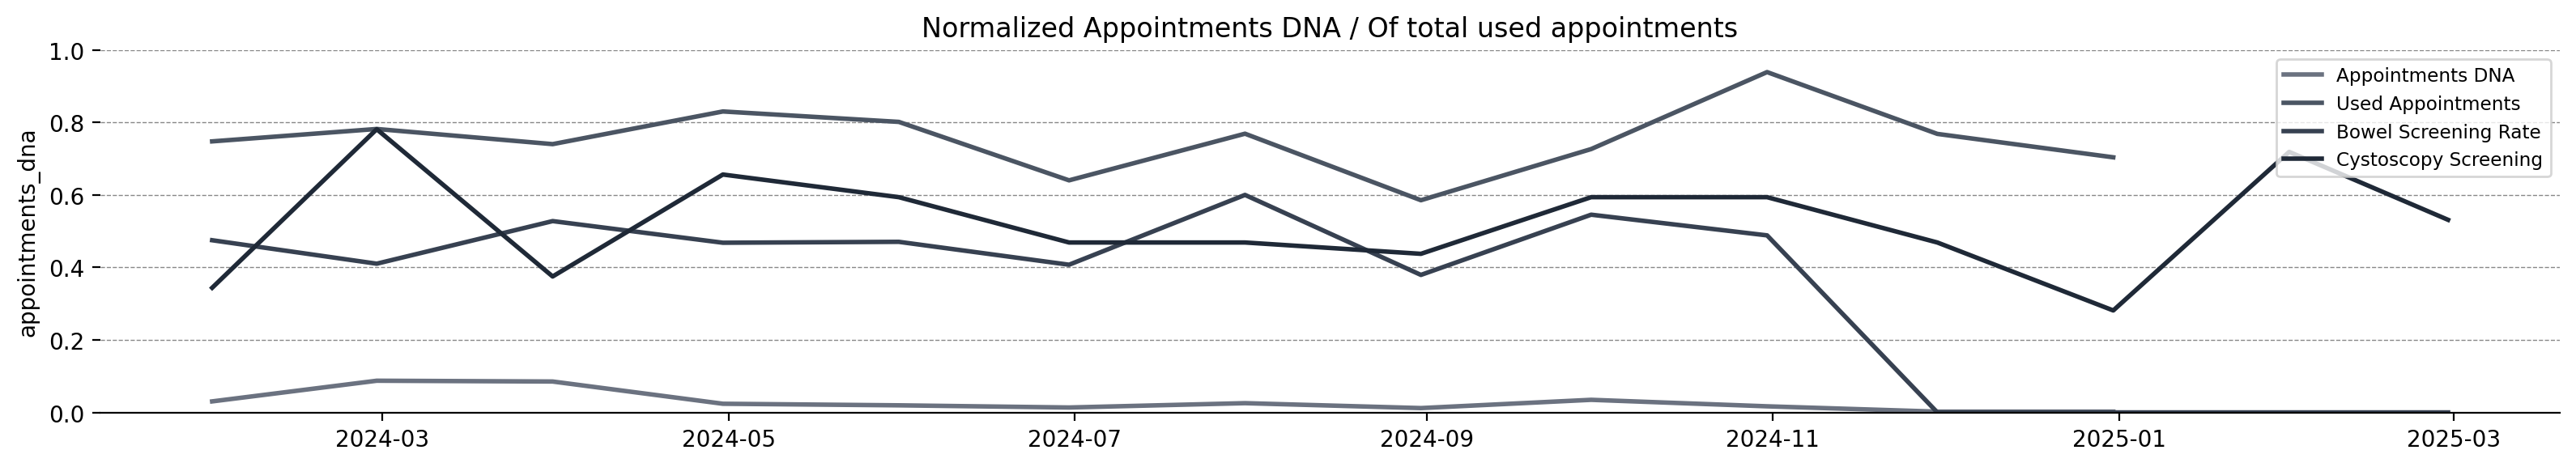

In [22]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.lineplot(ddf, x=ddf.index, y='appointments_dna', linewidth=2, color="#6b7280", label='Appointments DNA')
sns.lineplot(ddf, x=ddf.index, y='appointments_used', linewidth=2, color="#4b5563", label='Used Appointments')
sns.lineplot(ddf, x=ddf.index, y='bowel_screening_rate', linewidth=2, color="#374151", label='Bowel Screening Rate')
sns.lineplot(ddf, x=ddf.index, y='cx_screening', linewidth=2, color="#1f2937", label='Cystoscopy Screening')

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax_title = ax.set_title(
    "Normalized Appointments DNA / Of total used appointments"
)

plt.xlabel("")
plt.tight_layout()
plt.legend(loc='upper right', fontsize='small')  # Add legend with position and font size
plt.show()

<div class='status' style='background-color: #183a4b; color: white; padding-top: 4px; padding-bottom: 4px; padding-left: 20px; padding-right: 20px; border-radius: 10px; font-family: Arial, sans-serif; font-size: 26px; display: inline-block; text-align: center; box-shadow: 0px 3px 4px rgba(0, 0, 0, 0.5);'><b>** TEMPLATE</B> - Start here</div>

## Loading Libraries

In [1]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import datetime
import os
from tqdm import tqdm

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings("ignore")

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [2]:
from ai_medreview.build_surgery_metrics import *

<div class='status' style='background-color: #f5c244; color: white; padding-top: 2px; padding-bottom: 2px; padding-left: 7px; padding-right: 7px; border-radius: 6px; font-family: Arial, sans-serif; font-size: 18px; display: inline-block; text-align: center; box-shadow: 0px 3px 4px rgba(0, 0, 0, 0.2);'><b>Loading</b> dataset</div>

In [3]:
df_dict = load_data()

Table: appointments --------> DF Shape: (19798, 6)
Table: cx_screening --------> DF Shape: (234, 4)
Table: surgery --------> DF Shape: (10, 3)
Table: female_pts --------> DF Shape: (1309, 4)
Table: bowel_non_responder --------> DF Shape: (266, 4)
Table: bowel_normal --------> DF Shape: (235, 4)
Table: bowel_positive --------> DF Shape: (5, 4)


In [6]:
ddf = make_heatmap(df_dict, surgery_id=2)

Using dynamic list_size: 4250 for surgery_id: 2


In [72]:
df_dict['surgery']

,id,name,list_size
0,2,Earls-Court-Surgery,4250
1,1,Earls-Court-Medical-Centre,6817
2,3,Emperors-Gate-Health-Centre,6989
3,4,Health-Partners-at-Violet-Melchett,10153
4,6,Knightsbridge-Medical-Centre,15370
5,7,Scarsdale-Medical-Centre,7949
6,8,Stanhope-Mews-Surgery,16277
7,9,The-Abingdon-Medical-Practice,8787
8,10,The-Chelsea-Practice,6533
9,5,Kensington-Park-Medical-Centre,0


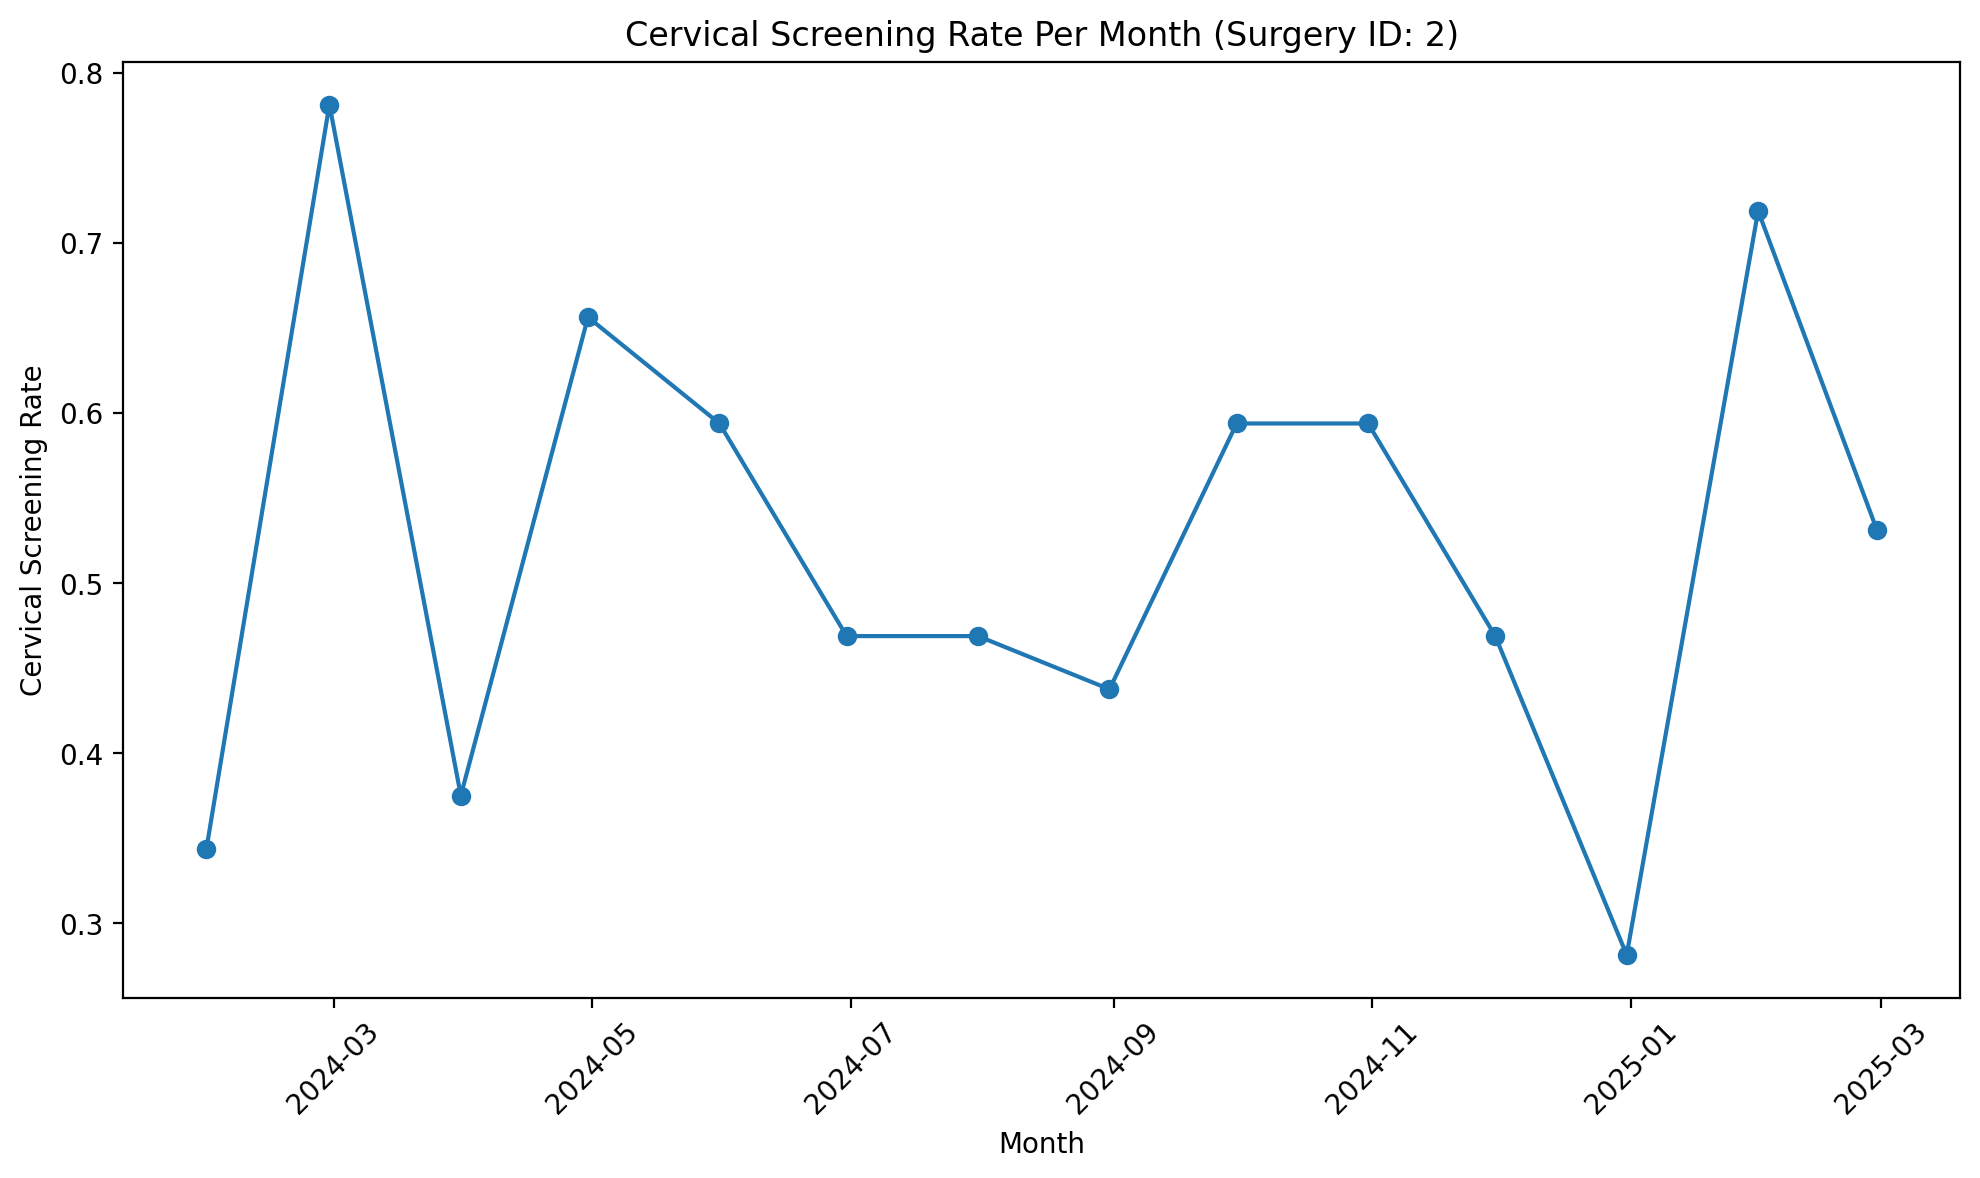

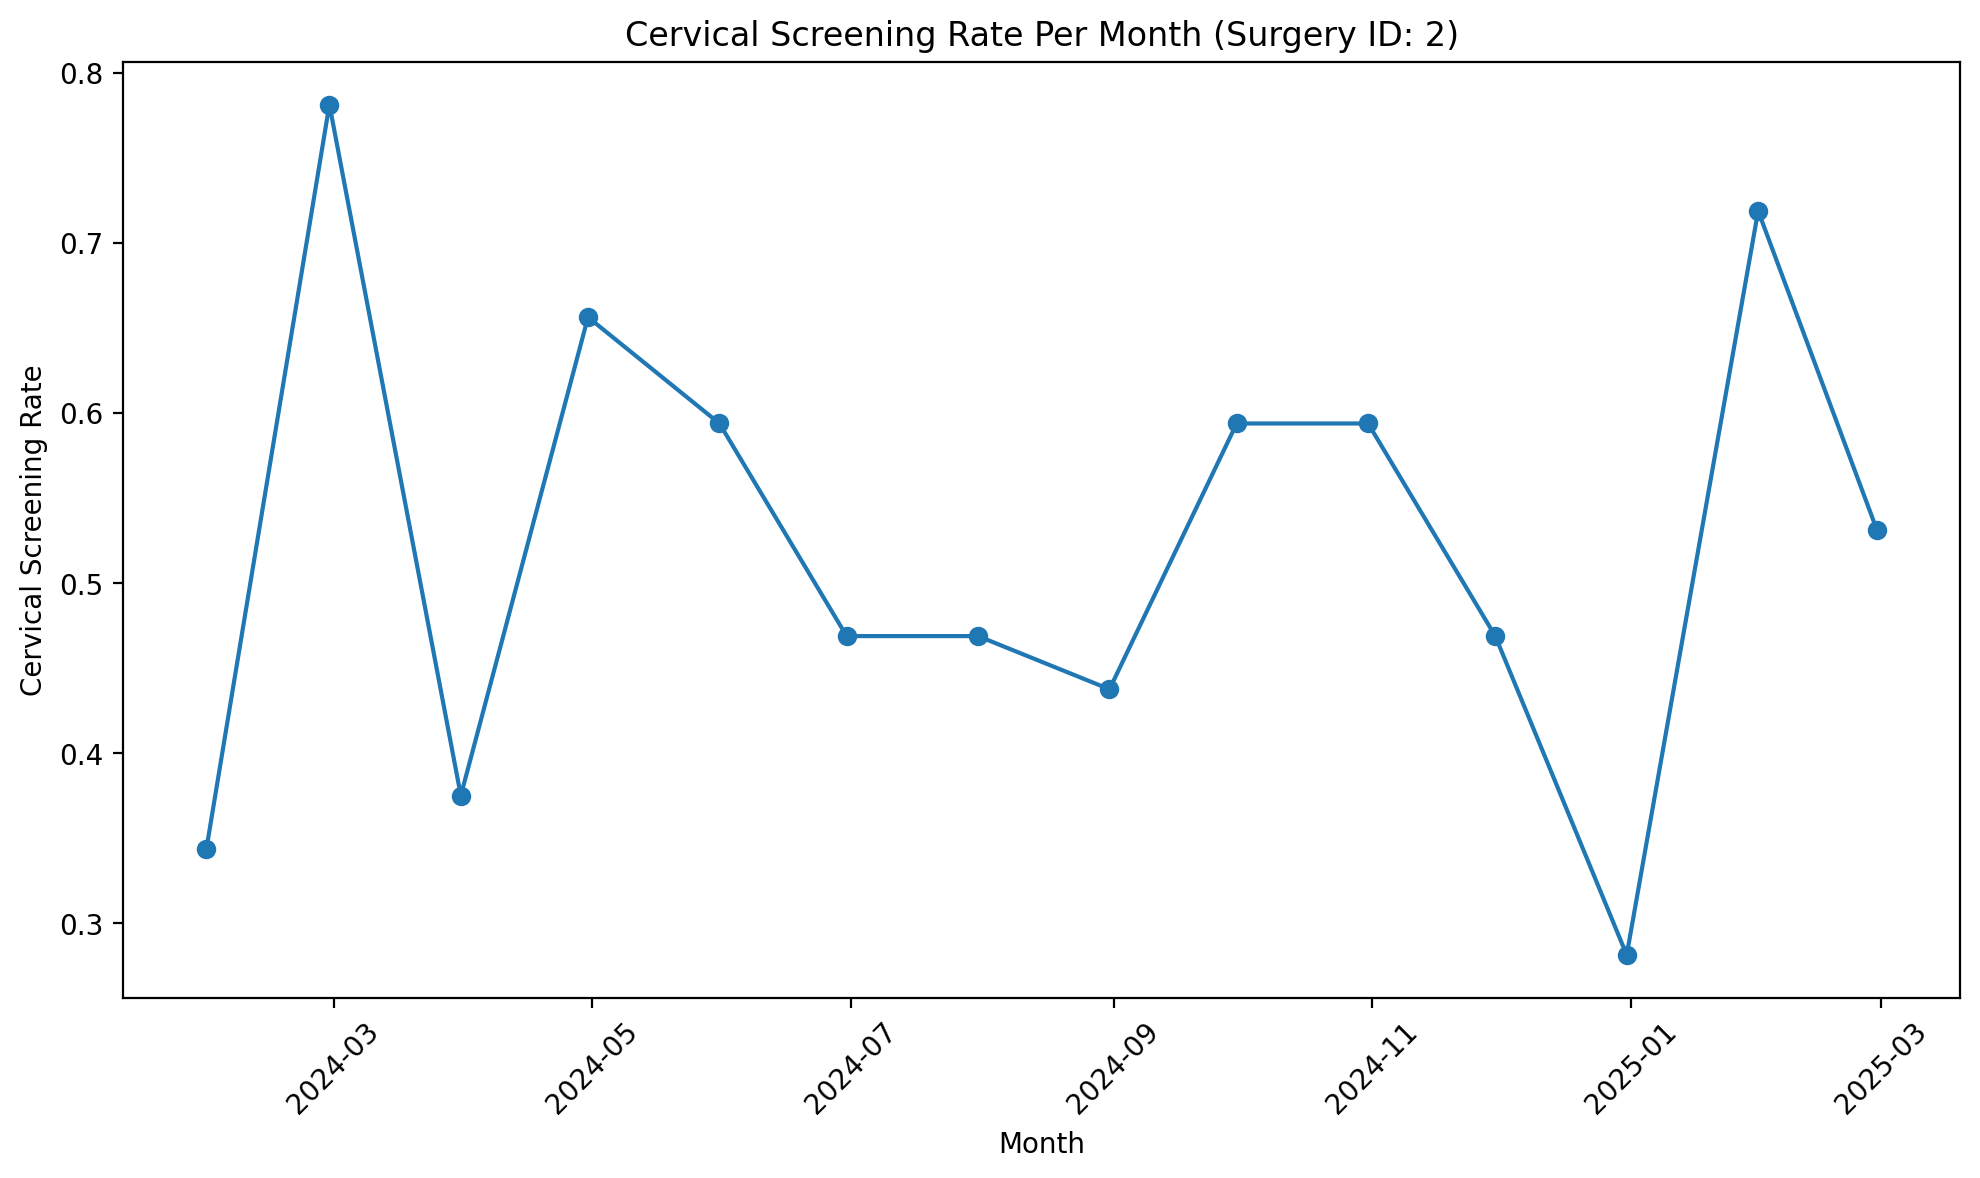

In [73]:
plot_cx_screening_rate(df_dict, surgery_id=2, figsize=(10,6), title=None)

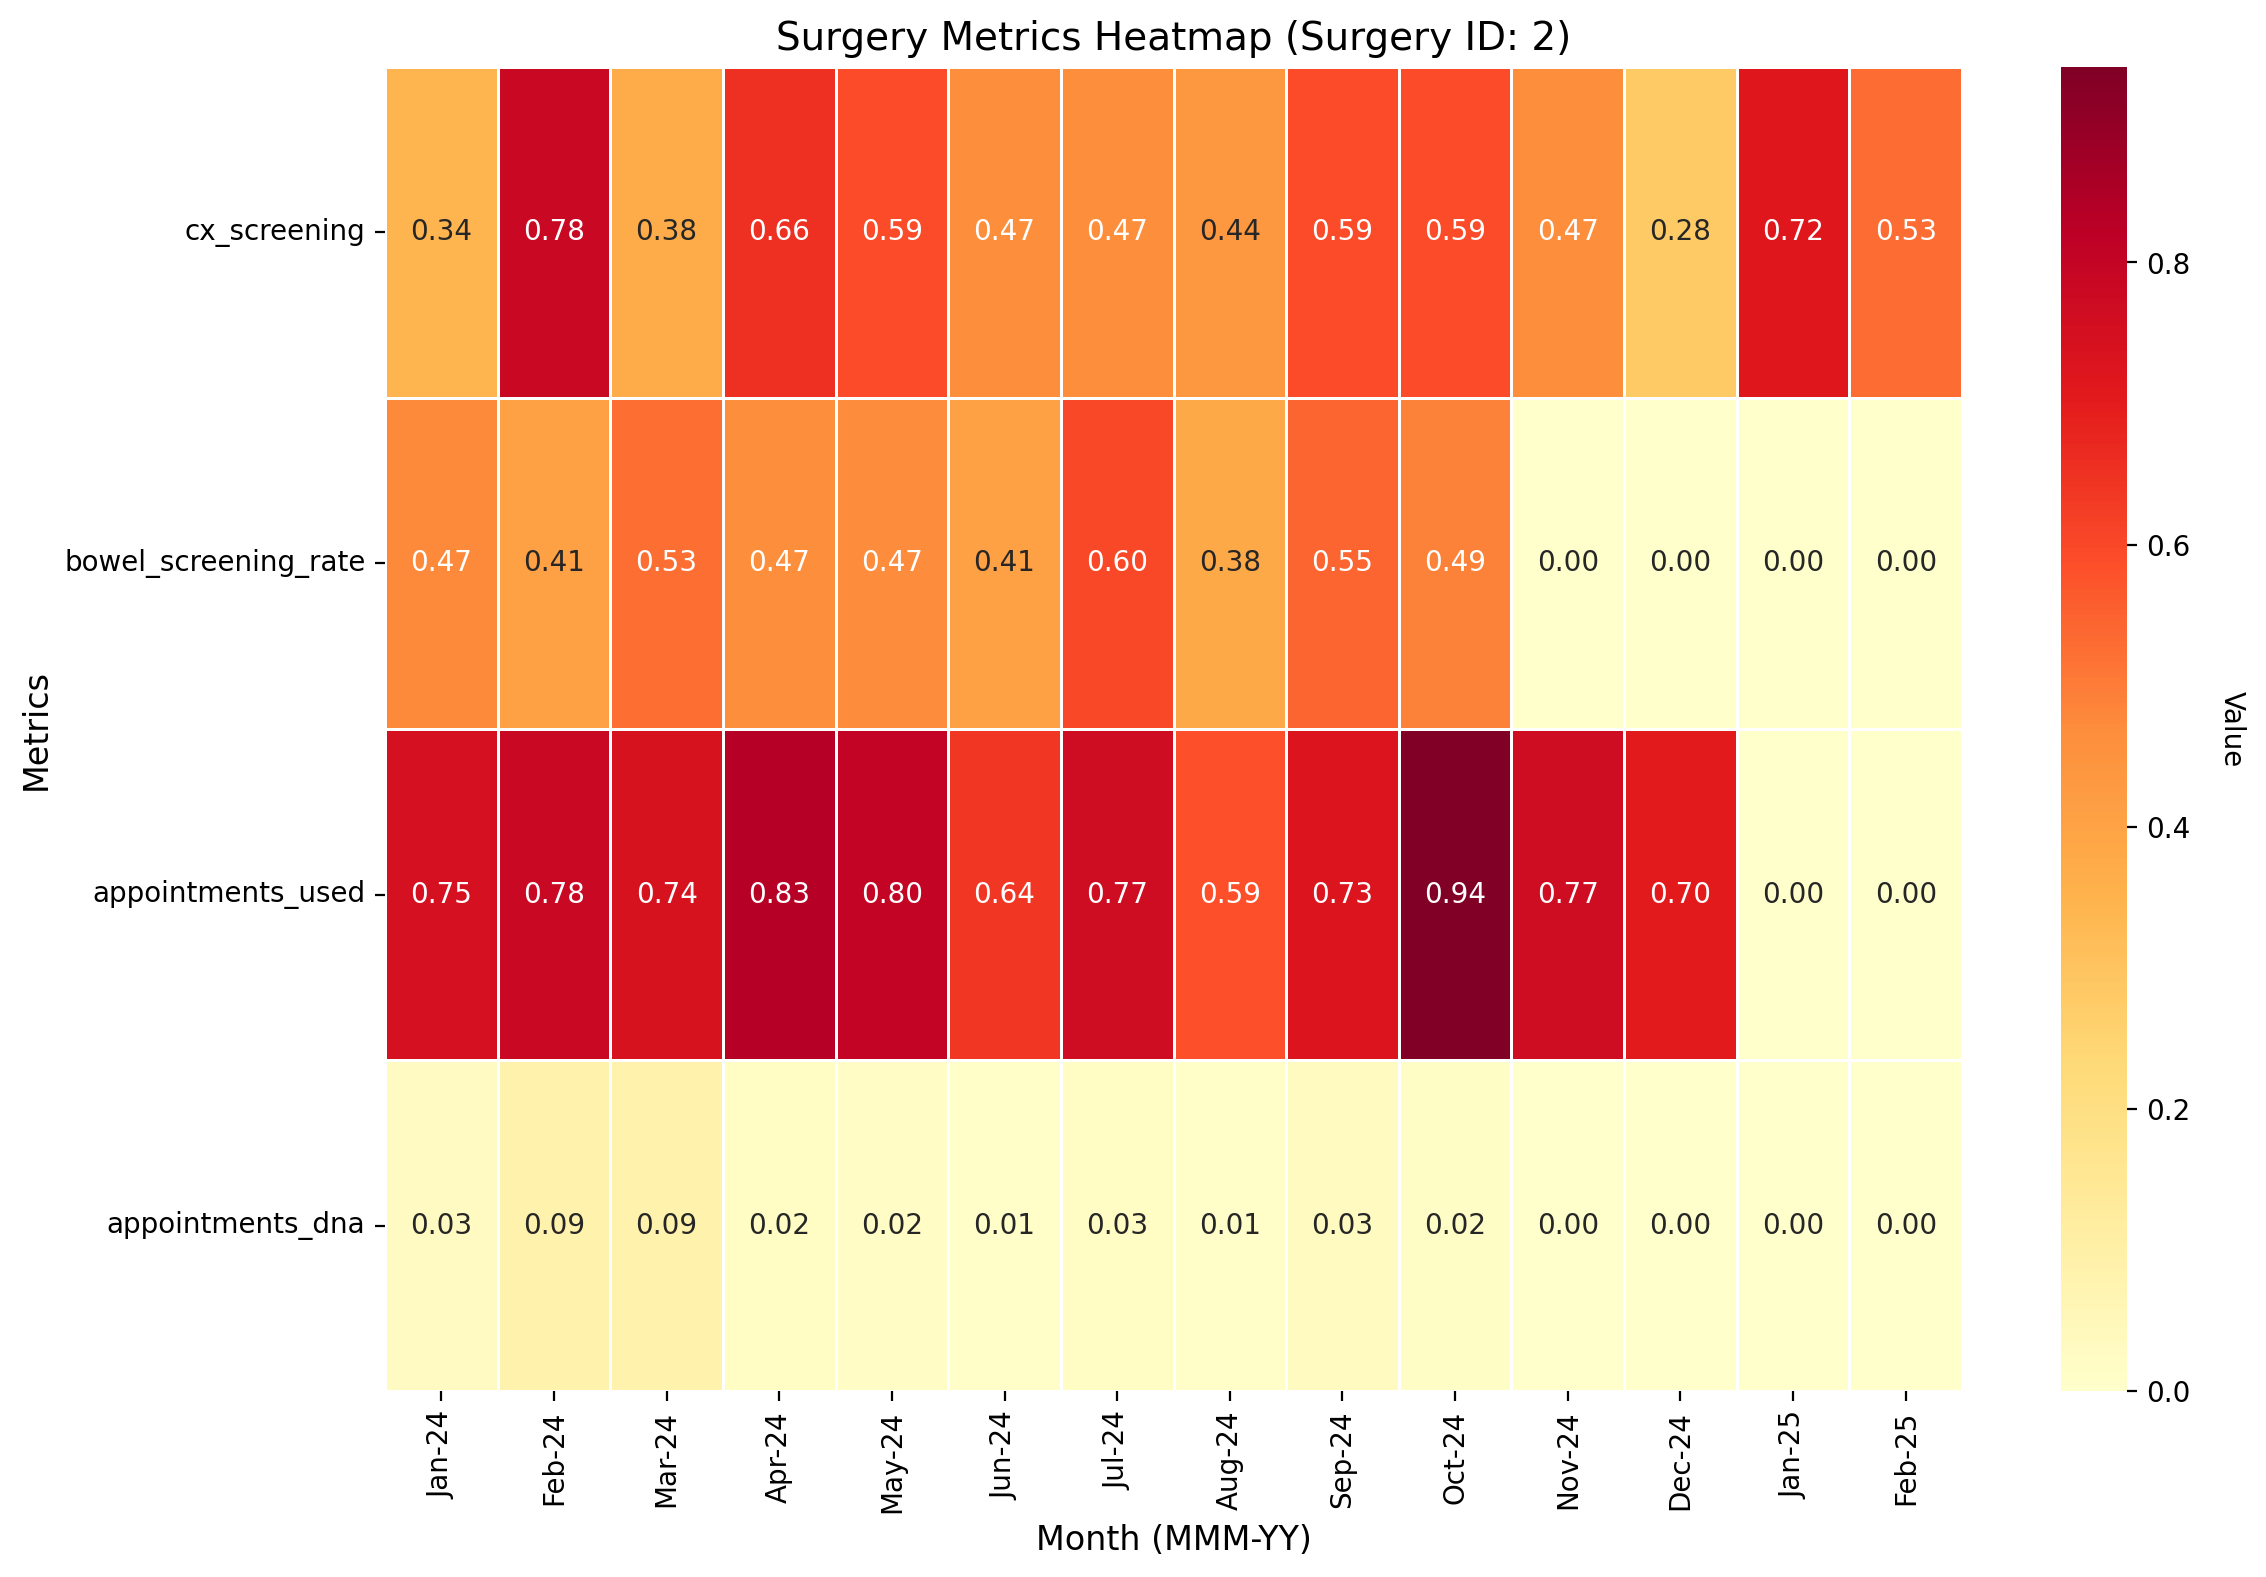

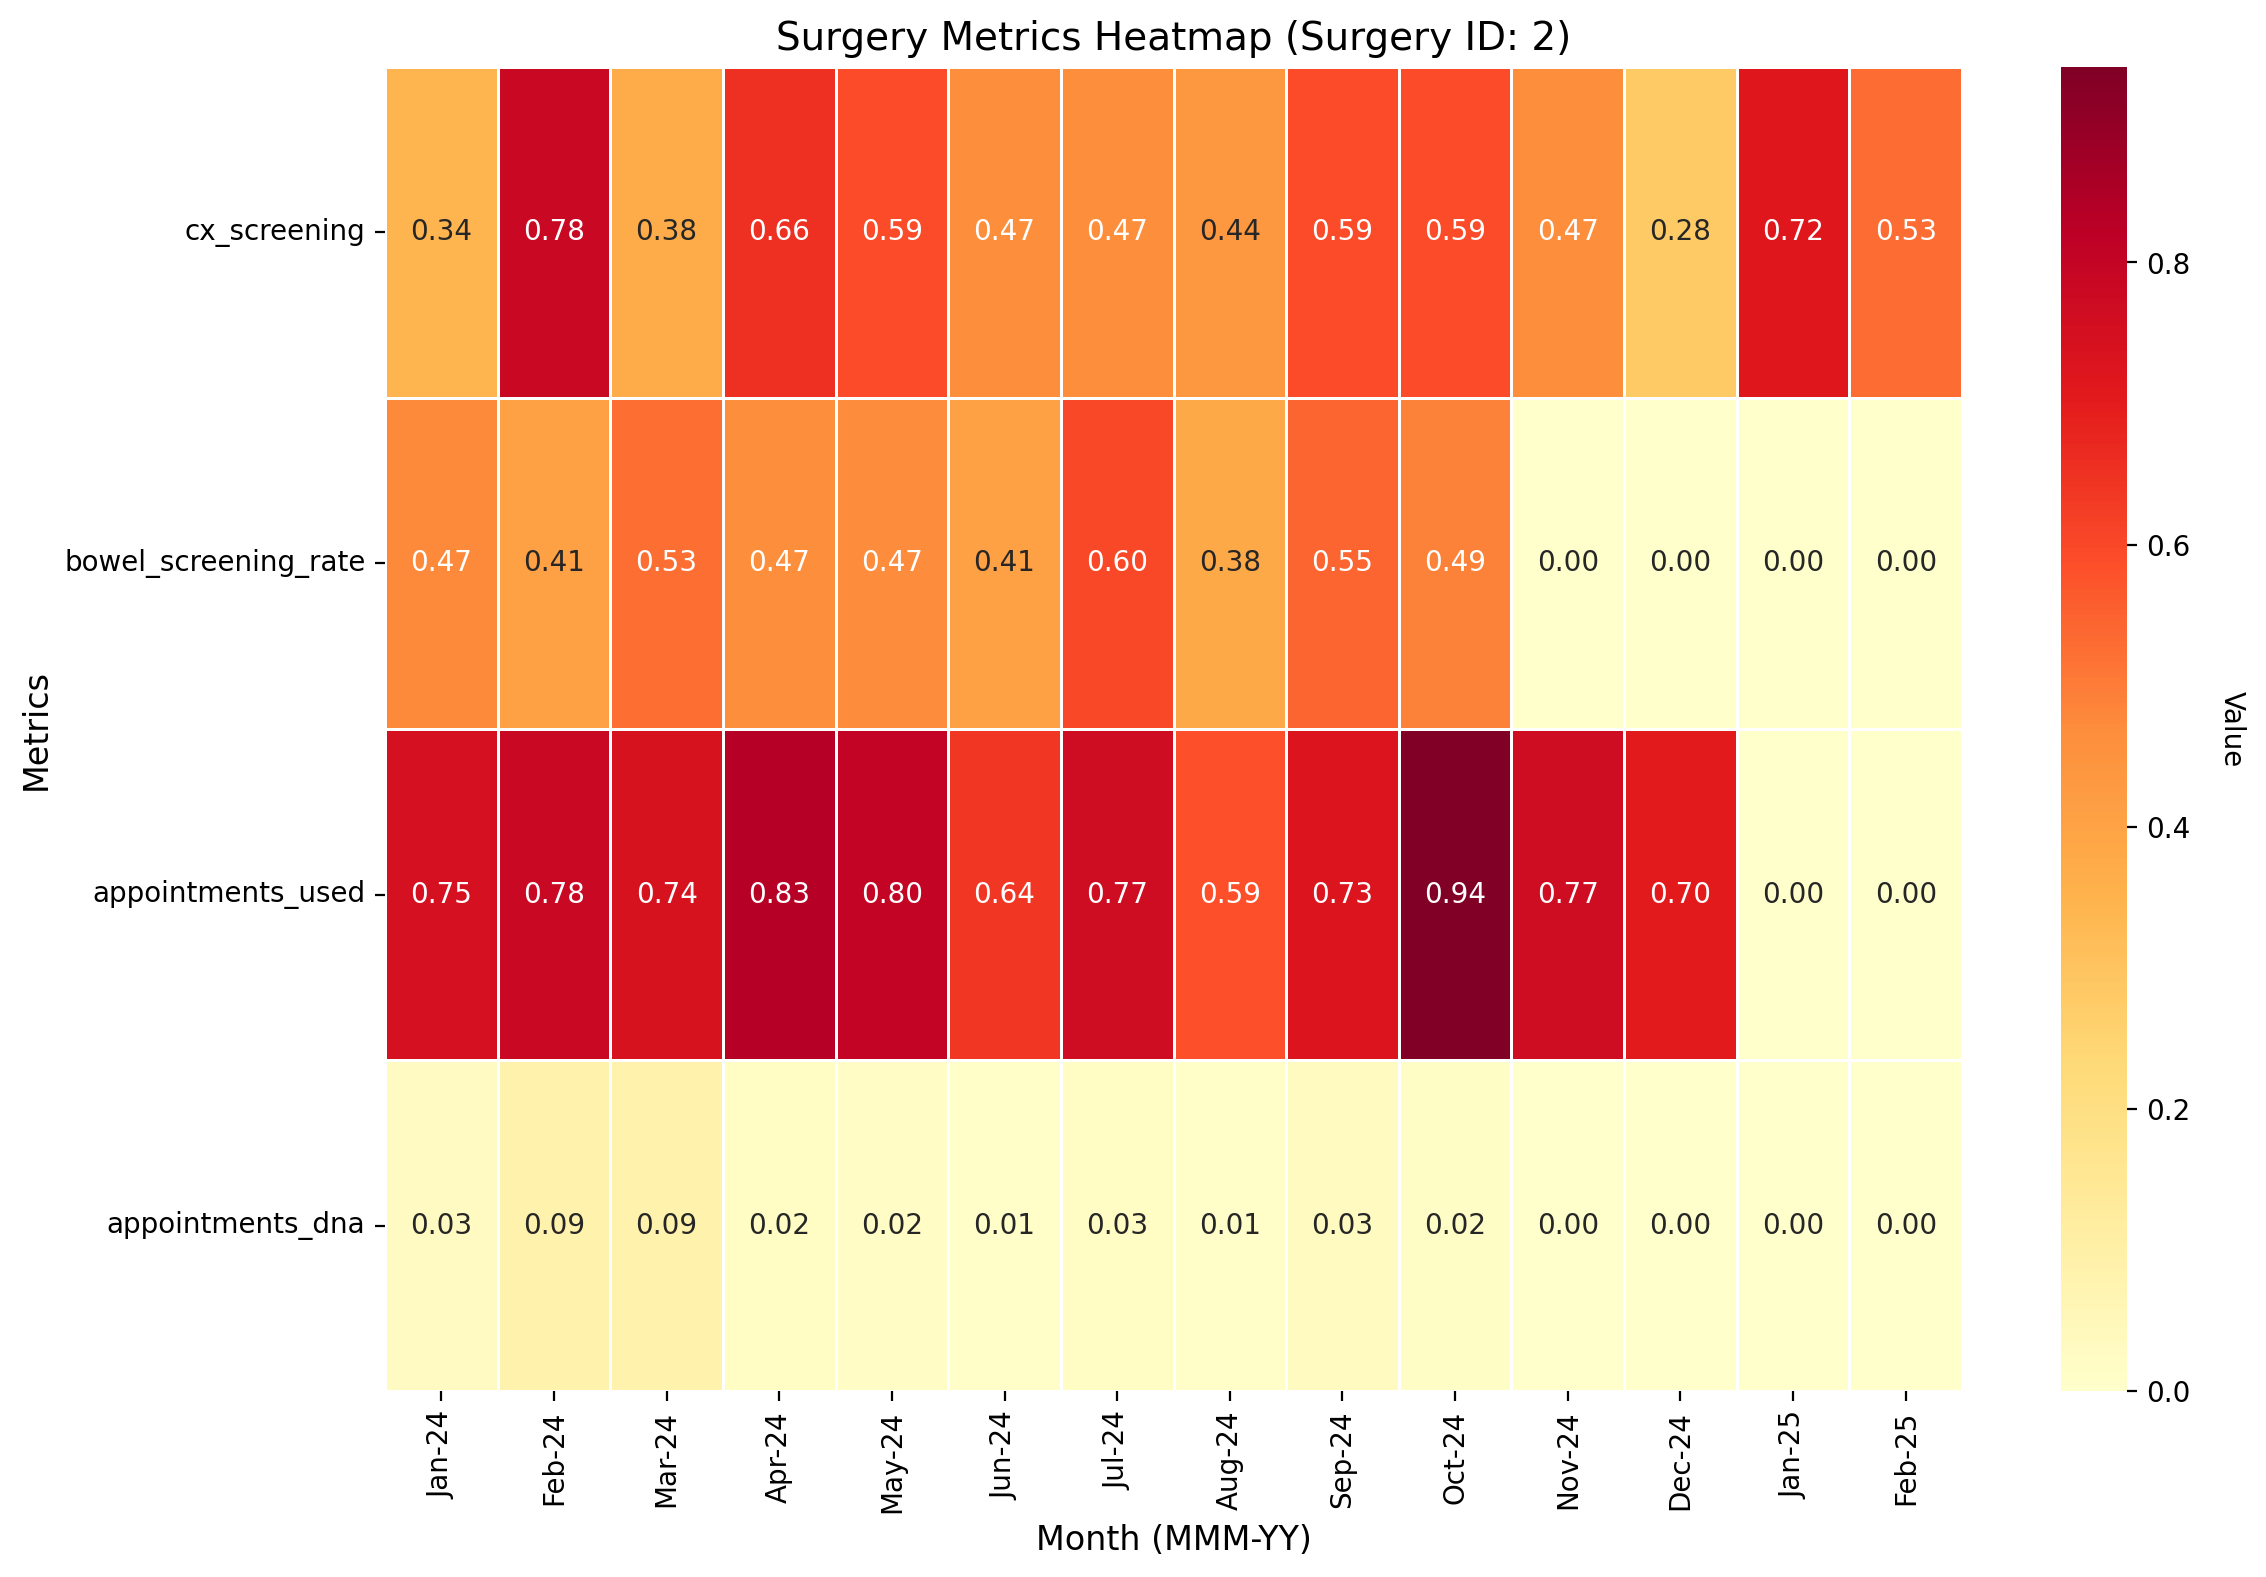

In [77]:
plot_heatmap(combined_df, surgery_id=2, figsize=(12, 8), cmap='YlOrRd', annot=True, title=None)

In [7]:
ddf.head()

,cx_screening,bowel_screening_rate,appointments_used,appointments_dna
event_date,,,,
2024-01-31,0.34375,0.475000,0.747692,0.030407
2024-02-29,0.78125,0.410256,0.781900,0.087421
2024-03-31,0.37500,0.527778,0.740090,0.085249
2024-04-30,0.65625,0.468085,0.830226,0.023891
2024-05-31,0.59375,0.470588,0.801448,0.019548


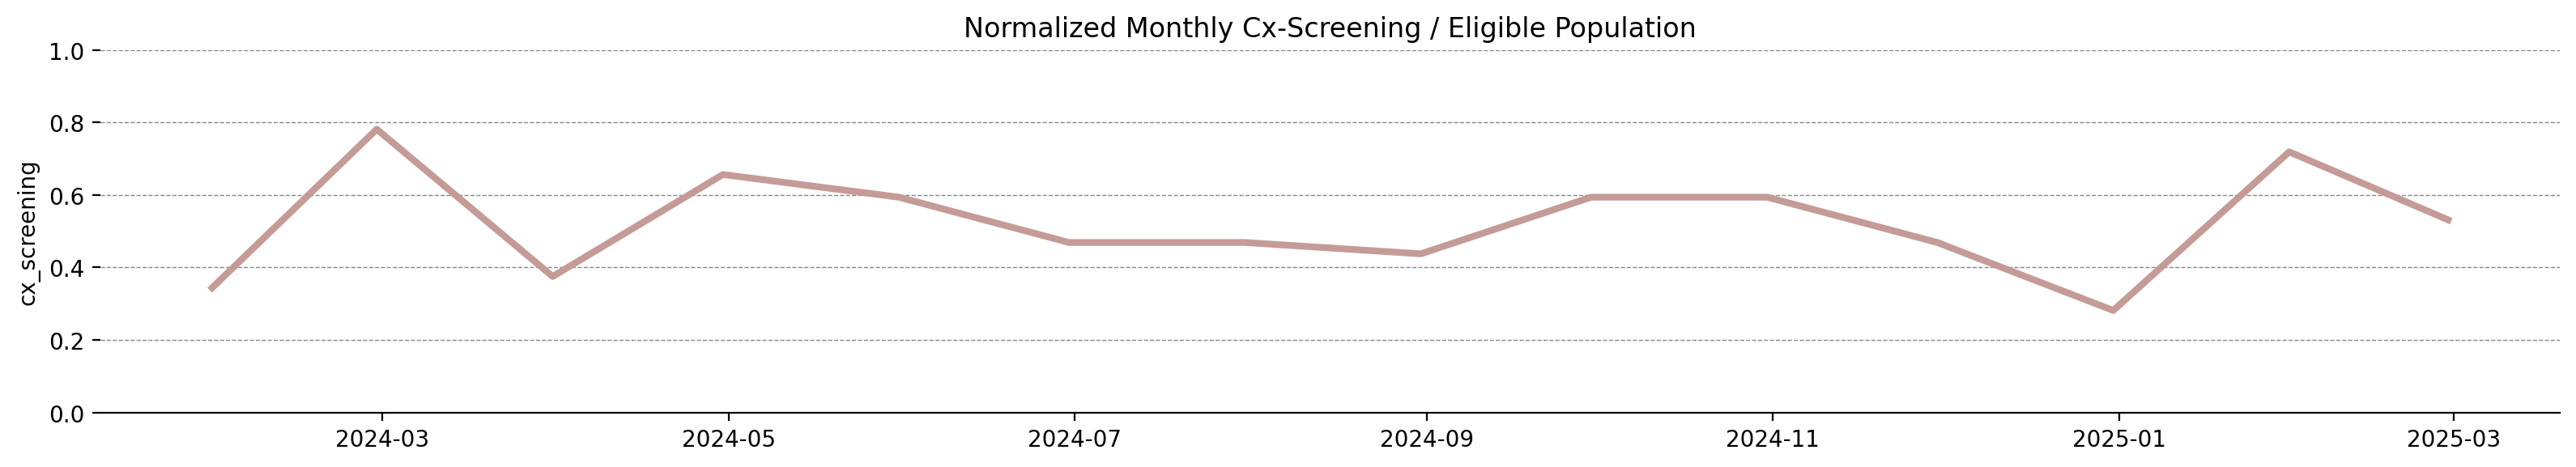

In [37]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.lineplot(ddf, x=ddf.index, y='cx_screening', linewidth=3, color="#c49b96")

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax_title = ax.set_title(
    "Normalized Monthly Cx-Screening / Eligible Population"
)

plt.xlabel("")
plt.tight_layout()
plt.show()

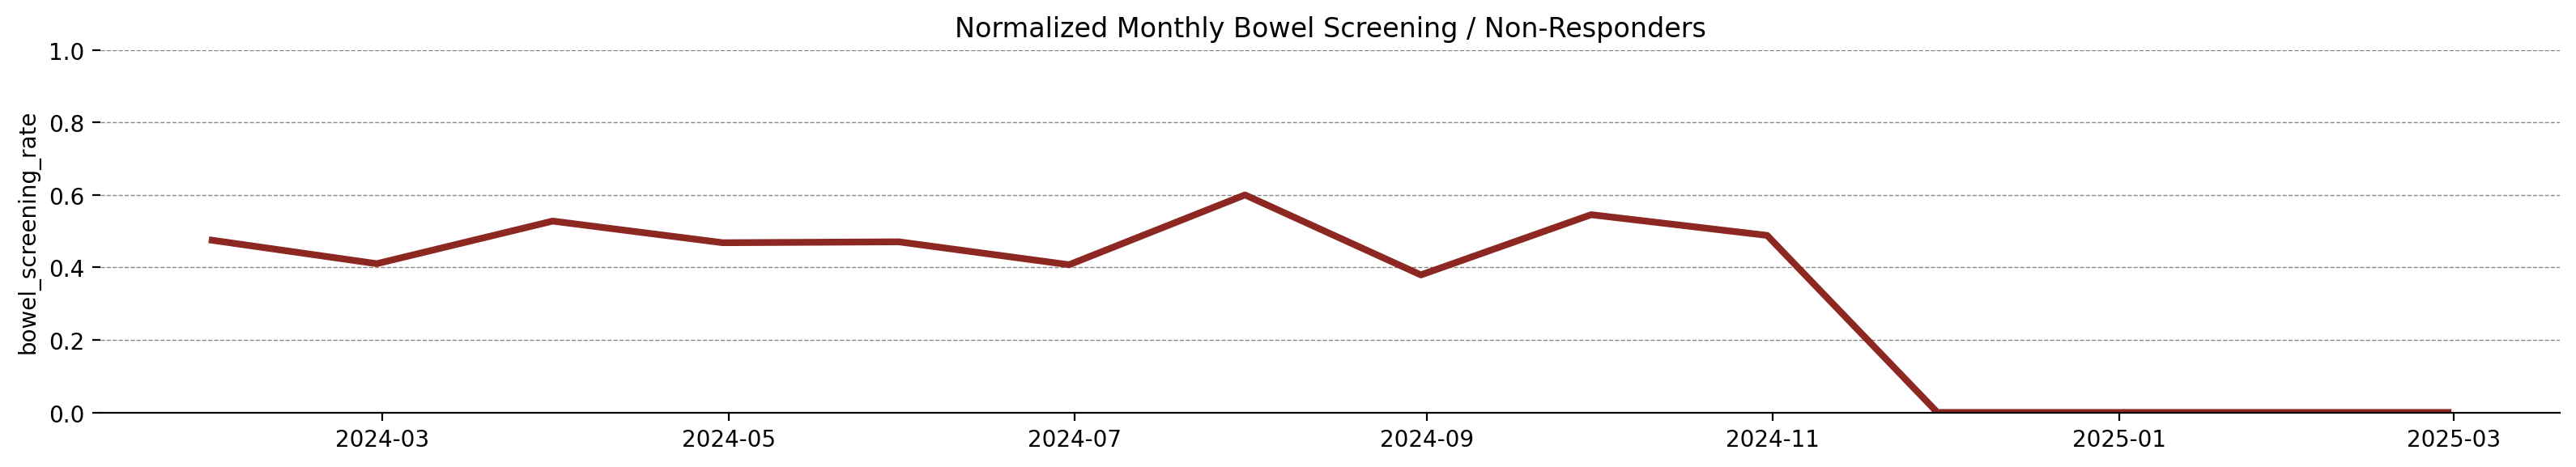

In [29]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.lineplot(ddf, x=ddf.index, y='bowel_screening_rate', linewidth=3, color="#8d2722")

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax_title = ax.set_title(
    "Normalized Monthly Bowel Screening / Non-Responders"
)

plt.xlabel("")
plt.tight_layout()
plt.show()

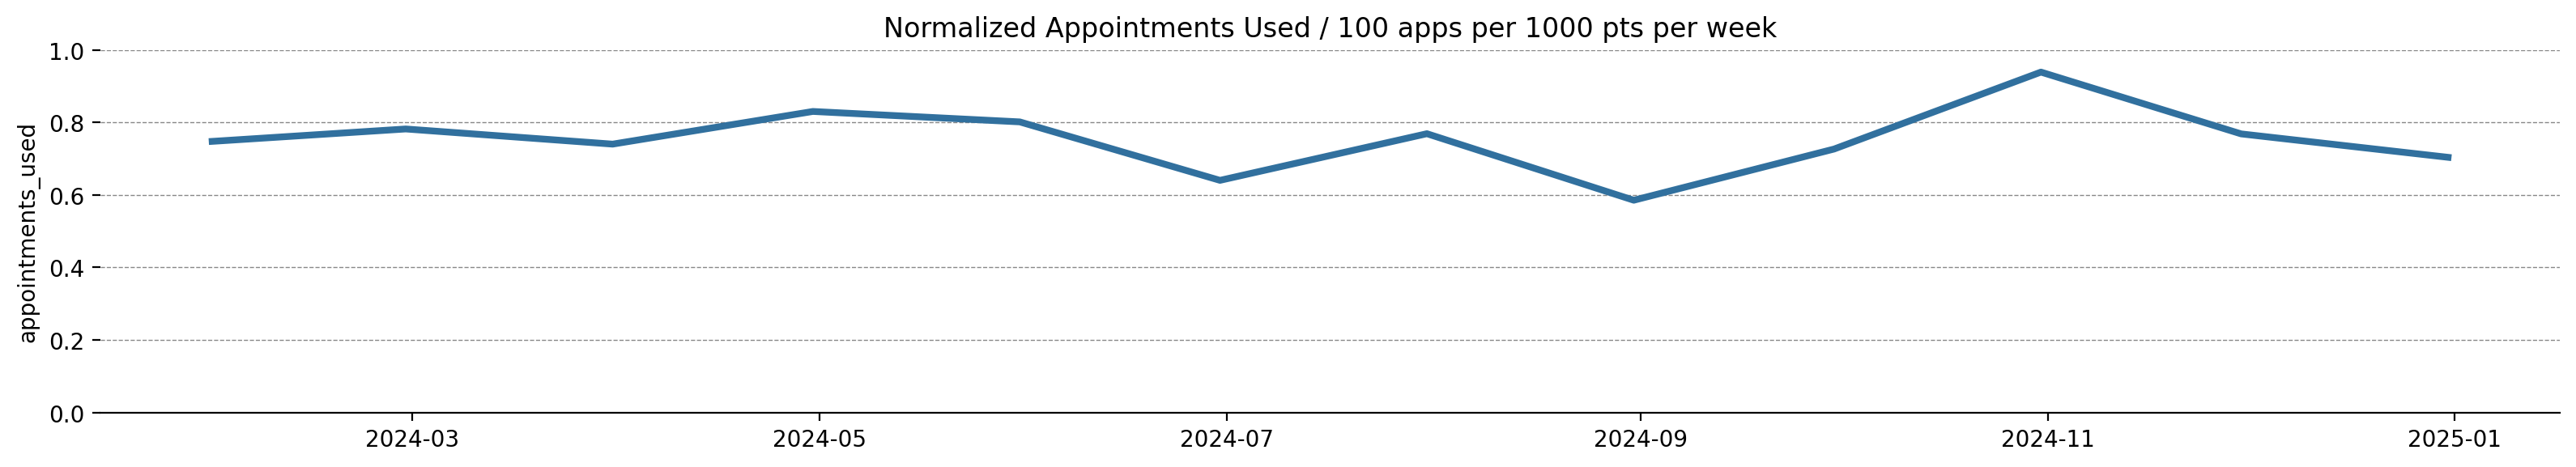

In [36]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.lineplot(ddf, x=ddf.index, y='appointments_used', linewidth=3, color="#31709e")

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax_title = ax.set_title(
    "Normalized Appointments Used / 100 apps per 1000 pts per week"
)

plt.xlabel("")
plt.tight_layout()
plt.show()

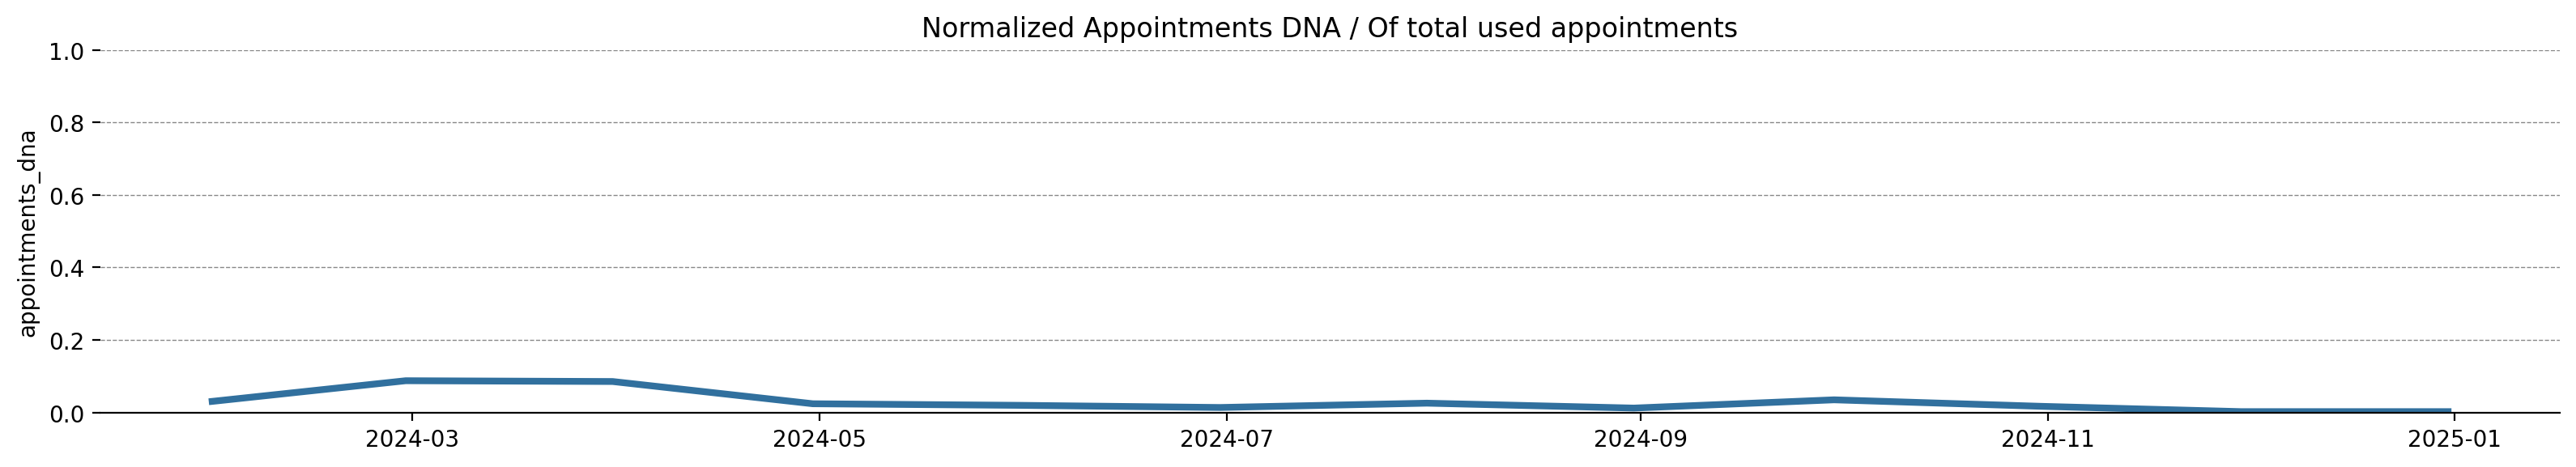

In [32]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.lineplot(ddf, x=ddf.index, y='appointments_dna', linewidth=3, color="#31709e")

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax_title = ax.set_title(
    "Normalized Appointments DNA / Of total used appointments"
)

plt.xlabel("")
plt.tight_layout()
plt.show()

In [10]:
import sketch

In [20]:
ddf.sketch.ask("When is our appointment usage at a peak?")

In [21]:
!pip install 'jupyter-ai[all]'

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.6 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 15.5 MB/s eta 0:00:0031m15.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.2 MB/s eta 0:00:0010.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.6 MB/s eta 0:00:005.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 13.9 MB/s eta 0:00:001m14.4 MB/s eta 0:00:01
  Created wheel for sgmllib3k: filename=sgmll